In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math, copy

In [5]:
df = pd.read_csv(r"c:\Users\barat\OneDrive\Desktop\Linear-Regression-Single-Input\datasets\student_study_hours\Student_Performance.csv")
print(df.head())

   StudyHours  ExamScore
0         0.5         30
1         1.0         34
2         1.5         36
3         2.0         40
4         2.5         42


In [6]:
x_train = df["StudyHours"].values
y_train = df["ExamScore"].values
print(f"x_train: {x_train}") 
print(f"y_train: {y_train}")

x_train: [ 0.5  1.   1.5  2.   2.5  3.   3.5  4.   4.5  5.   5.5  6.   6.5  7.
  7.5  8.   8.5  9.   9.5 10.  10.5 11.  11.5 12.  12.5 13.  13.5 14.
 14.5 15. ]
y_train: [30 34 36 40 42 45 48 50 52 55 58 60 62 65 67 70 72 74 76 78 80 82 84 86
 88 90 91 93 95 96]


In [7]:
x_mean = x_train.mean()
x_std = x_train.std()
x_train = (x_train - x_mean) / x_std
print(f"x_train : {x_train}")

x_train : [-1.67524673 -1.55971247 -1.44417822 -1.32864396 -1.2131097  -1.09757545
 -0.98204119 -0.86650693 -0.75097267 -0.63543842 -0.51990416 -0.4043699
 -0.28883564 -0.17330139 -0.05776713  0.05776713  0.17330139  0.28883564
  0.4043699   0.51990416  0.63543842  0.75097267  0.86650693  0.98204119
  1.09757545  1.2131097   1.32864396  1.44417822  1.55971247  1.67524673]


In [8]:
def compute_cost(x, y, w, b):
    m = x.shape[0]
    cost = 0
    for i in range(m):
        f_wb = w * x[i] + b
        cost = cost + (f_wb - y[i]) ** 2
    total_cost = 1 / (2 * m) * cost
    return total_cost
        

In [9]:
def compute_gradient(x, y, w, b):
    m = x.shape[0]
    dj_dw = 0
    dj_db = 0
    for i in range(m):
        f_wb = w * x[i] + b
        dj_dw_i = (f_wb - y[i]) * x[i]
        dj_db_i =  f_wb - y[i]
        dj_dw += dj_dw_i
        dj_db += dj_db_i
    dj_dw = dj_dw / m
    dj_db = dj_db / m
    return dj_dw, dj_db
    

In [10]:
def gradient_descent(x, y, w_in, b_in, alpha, num_iters, cost_function, gradient_function):
    J_history = []
    p_history = []
    w = w_in
    b = b_in
    
    for i in range(num_iters):
        dj_dw, dj_db = gradient_function(x, y, w, b)
        w = w - alpha * dj_dw
        b = b - alpha * dj_db
        if i<10000:      # prevent resource exhaustion 
            J_history.append( cost_function(x, y, w , b))
            p_history.append([w,b])
        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters/10) == 0:
            print(f"Iteration {i:4}: Cost {J_history[-1]:0.2e} ",
                  f"dj_dw: {dj_dw: 0.3e}, dj_db: {dj_db: 0.3e}  ",
                  f"w: {w: 0.3e}, b:{b: 0.5e}")
 
    return w, b, J_history, p_history     
        

In [11]:
w_init = 0
b_init = 0
temp_alpha = 0.01
iteration = 1000
w_final, b_final, J_hist, p_hist = gradient_descent(x_train, y_train, w_init, b_init, temp_alpha, iteration, compute_cost, compute_gradient)


Iteration    0: Cost 2.37e+03  dj_dw: -1.960e+01, dj_db: -6.663e+01   w:  1.960e-01, b: 6.66333e-01
Iteration  100: Cost 3.18e+02  dj_dw: -7.176e+00, dj_db: -2.439e+01   w:  1.250e+01, b: 4.24873e+01
Iteration  200: Cost 4.37e+01  dj_dw: -2.627e+00, dj_db: -8.928e+00   w:  1.700e+01, b: 5.77951e+01
Iteration  300: Cost 6.97e+00  dj_dw: -9.614e-01, dj_db: -3.268e+00   w:  1.865e+01, b: 6.33983e+01
Iteration  400: Cost 2.05e+00  dj_dw: -3.519e-01, dj_db: -1.196e+00   w:  1.926e+01, b: 6.54492e+01
Iteration  500: Cost 1.39e+00  dj_dw: -1.288e-01, dj_db: -4.378e-01   w:  1.948e+01, b: 6.61999e+01
Iteration  600: Cost 1.30e+00  dj_dw: -4.715e-02, dj_db: -1.603e-01   w:  1.956e+01, b: 6.64747e+01
Iteration  700: Cost 1.29e+00  dj_dw: -1.726e-02, dj_db: -5.866e-02   w:  1.959e+01, b: 6.65753e+01
Iteration  800: Cost 1.29e+00  dj_dw: -6.317e-03, dj_db: -2.147e-02   w:  1.960e+01, b: 6.66121e+01
Iteration  900: Cost 1.29e+00  dj_dw: -2.312e-03, dj_db: -7.859e-03   w:  1.960e+01, b: 6.66256e+01


In [12]:
w = w_final
b = b_final
print(f"w : {w}")
print(f"b : {b}")

w : 19.603391566301884
b : 66.63045668921417


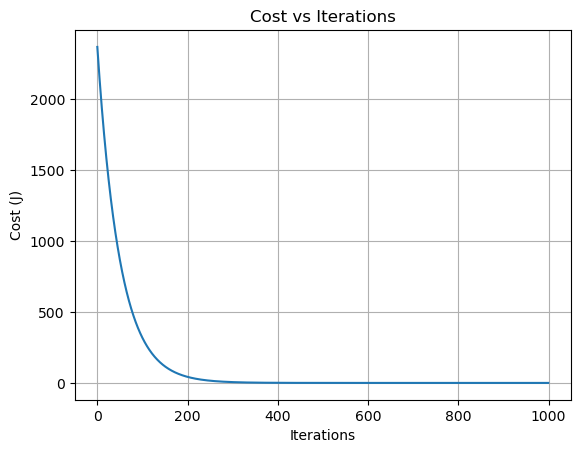

In [13]:
iterations = np.arange(len(J_hist))
plt.figure()
plt.plot(iterations, J_hist)
plt.xlabel("Iterations")
plt.ylabel("Cost (J)")
plt.title("Cost vs Iterations")
plt.grid(True)
#plt.savefig("results/cost_vs_iterations.png")
plt.show()

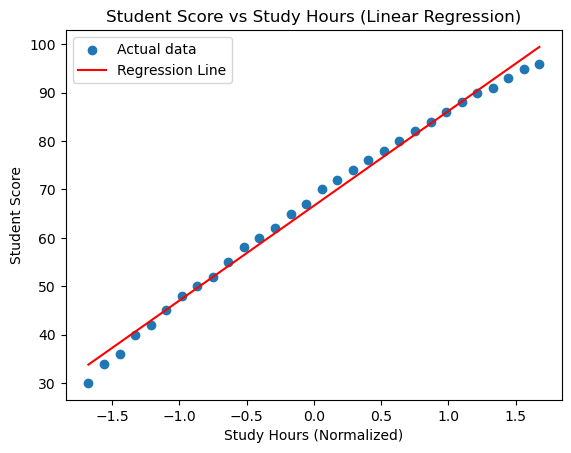

In [15]:
y_predict = w * x_train + b
plt.figure()
plt.scatter(x_train, y_train, label= "Actual data")
plt.plot(x_train, y_predict, color = "red", label="Regression Line")
plt.xlabel("Study Hours (Normalized)")
plt.ylabel("Student Score")
plt.legend()
plt.title("Student Score vs Study Hours (Linear Regression)")
plt.savefig("results/regression_line.png")
plt.show()